In [86]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [87]:
audit_risk=pd.read_csv('audit_risk.csv')
trial=pd.read_csv('trial.csv')

# Individual Data Exploration

Audit_Risk

In [88]:
audit_risk.shape

(776, 27)

In [89]:
audit_risk.info()
audit_risk.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
Sector_score      776 non-null float64
LOCATION_ID       776 non-null object
PARA_A            776 non-null float64
Score_A           776 non-null float64
Risk_A            776 non-null float64
PARA_B            776 non-null float64
Score_B           776 non-null float64
Risk_B            776 non-null float64
TOTAL             776 non-null float64
numbers           776 non-null float64
Score_B.1         776 non-null float64
Risk_C            776 non-null float64
Money_Value       775 non-null float64
Score_MV          776 non-null float64
Risk_D            776 non-null float64
District_Loss     776 non-null int64
PROB              776 non-null float64
RiSk_E            776 non-null float64
History           776 non-null int64
Prob              776 non-null float64
Risk_F            776 non-null float64
Score             776 non-null float64
Inherent_Risk     776 non-null float64
CON

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.4,0,0.2,0.0,2.0,2.156,0.4,0.5,0.4312,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,...,0.4,0,0.2,0.0,3.2,31.774,0.4,0.5,6.3548,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,...,0.4,0,0.2,0.0,4.2,18.034,0.4,0.5,3.6068,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,...,0.4,0,0.2,0.0,4.2,17.206,0.4,0.5,3.4412,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.4,0,0.2,0.0,2.4,4.372,0.4,0.5,0.8744,0


#### Trial

In [90]:
trial.shape

(776, 18)

In [91]:
trial.info()
trial.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
Sector_score     776 non-null float64
LOCATION_ID      776 non-null object
PARA_A           776 non-null float64
SCORE_A          776 non-null int64
PARA_B           776 non-null float64
SCORE_B          776 non-null int64
TOTAL            776 non-null float64
numbers          776 non-null float64
Marks            776 non-null int64
Money_Value      775 non-null float64
MONEY_Marks      776 non-null int64
District         776 non-null int64
Loss             776 non-null int64
LOSS_SCORE       776 non-null int64
History          776 non-null int64
History_score    776 non-null int64
Score            776 non-null float64
Risk             776 non-null int64
dtypes: float64(7), int64(10), object(1)
memory usage: 109.2+ KB


,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
5,3.89,6,0.00,2,0.83,2,0.83,5.0,2,2.95,2,2,0,2,0,2,2.0,0
6,3.89,7,1.10,4,7.41,4,8.51,5.0,2,44.95,6,2,0,2,0,2,3.2,1
7,3.89,8,8.50,6,12.03,6,20.53,5.5,4,7.79,4,2,0,2,0,2,4.2,1
8,3.89,8,8.40,6,11.05,6,19.45,5.5,4,7.34,4,2,0,2,0,2,4.2,1
9,3.89,8,3.98,6,0.99,2,4.97,5.0,2,1.93,2,2,0,2,0,2,2.4,1


# Data Merging and Preprocessing

1. Drop duplicate rows and columns
2. Merging of the two datasets
3. Handle categorical variable: Location_ID
4. Handle missing values
5. Handle ouliers for scaling
5. Feature Extraction for ML algorithms using corr and research

In [92]:
trial=trial.drop_duplicates(keep='first')
audit_risk=audit_risk.drop_duplicates(keep='first')

print(audit_risk.shape)
print(trial.shape)

(763, 27)
(763, 18)


Score_A and Score_B are two columns which are exactly same but recorded in two different scales. Thus we remove these from the trial dataset

In [93]:
trial = trial.drop(['SCORE_A','SCORE_B'], axis = 1)

In [94]:
audit_risk_columns = set(audit_risk.columns)
trial_columns = set(trial.columns)

audit_risk_columns.intersection(trial.columns)

{'History',
 'LOCATION_ID',
 'Money_Value',
 'PARA_A',
 'PARA_B',
 'Risk',
 'Score',
 'Sector_score',
 'TOTAL',
 'numbers'}

#### MERGING 2 DATASETS

In [95]:
# Merging on common columns
df = audit_risk.merge(trial, how = 'inner', on = ['History', 'LOCATION_ID', 'Money_Value','PARA_A','PARA_B','Score','Sector_score','TOTAL','numbers'], sort = False)

In [96]:
df.shape

(763, 34)

In [97]:
df.head(10)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,Risk_x,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_y
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.5,1.7148,1,2,2,2,0,2,2,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5,0.5108,0,2,2,2,0,2,2,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.5,0.3096,0,2,2,2,0,2,2,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.5,3.5060,1,6,6,2,0,2,2,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.5,0.2832,0,2,2,2,0,2,2,0
5,3.89,6,0.00,0.2,0.000,0.83,0.2,0.166,0.83,5.0,...,0.5,0.4312,0,2,2,2,0,2,2,0
6,3.89,7,1.10,0.4,0.440,7.41,0.4,2.964,8.51,5.0,...,0.5,6.3548,1,2,6,2,0,2,2,1
7,3.89,8,8.50,0.6,5.100,12.03,0.6,7.218,20.53,5.5,...,0.5,3.6068,1,4,4,2,0,2,2,1
8,3.89,8,8.40,0.6,5.040,11.05,0.6,6.630,19.45,5.5,...,0.5,3.4412,1,4,4,2,0,2,2,1
9,3.89,8,3.98,0.6,2.388,0.99,0.2,0.198,4.97,5.0,...,0.5,0.8744,0,2,2,2,0,2,2,1


#### HANDLING CATEGORICAL COLUMNS

In [98]:
df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [99]:
df=df[~df.LOCATION_ID.str.contains("LOHARU")]
df=df[~df.LOCATION_ID.str.contains("NUH")]
df=df[~df.LOCATION_ID.str.contains("SAFIDON")]

#Converting the LOCATION_ID column with replaced string values to a float column
df['LOCATION_ID'] = df['LOCATION_ID'].astype(float)

#### HANDLING MISSING DATA

In [100]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk_x            0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
Risk_y            0
dtype: int64

In [101]:
df = df.fillna(df["Money_Value"].mean())
type(df)

pandas.core.frame.DataFrame

#### HANDLING OUTLIERS FOR SCALING

In [102]:
from numpy import mean
from numpy import std

cols_with_outliers = []
print('Outliers in: ')
for i in df:
    data_mean, data_std = mean(df[i]), std(df[i])
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in df[i] if x < lower or x > upper]
    print(i + ' %d' % len(outliers))
    if len(outliers)>0:
        cols_with_outliers.append(i)

Outliers in: 
Sector_score 0
LOCATION_ID 0
PARA_A 7
Score_A 0
Risk_A 7
PARA_B 1
Score_B 0
Risk_B 1
TOTAL 2
numbers 22
Score_B.1 22
Risk_C 22
Money_Value 6
Score_MV 0
Risk_D 6
District_Loss 0
PROB 22
RiSk_E 6
History 15
Prob 15
Risk_F 15
Score 0
Inherent_Risk 7
CONTROL_RISK 15
Detection_Risk 0
Audit_Risk 6
Risk_x 0
Marks 22
MONEY_Marks 0
District 0
Loss 21
LOSS_SCORE 22
History_score 15
Risk_y 0


In [103]:
print(cols_with_outliers)

['PARA_A', 'Risk_A', 'PARA_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Risk_D', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Inherent_Risk', 'CONTROL_RISK', 'Audit_Risk', 'Marks', 'Loss', 'LOSS_SCORE', 'History_score']


(0, 50)

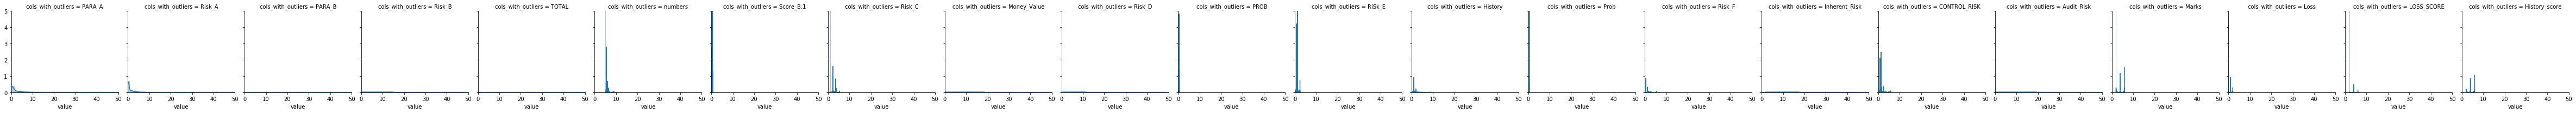

In [104]:
plot = pd.DataFrame(df, columns = cols_with_outliers)
plot_melt = plot.melt(var_name='cols_with_outliers')
plot = sns.FacetGrid(plot_melt, col='cols_with_outliers')
plot = (plot.map(sns.distplot, 'value'))
axes = plot.axes
axes[0,0].set_ylim(0,5)
axes[0,0].set_xlim(0,50)

TYPE OF SCALING: 

Since it is evident from the above distribution plots that the distribution of data is not Gaussian, we will use MinMax Scaler to obtain smaller SD.
    

#### Feature Extraction for ML algorithms

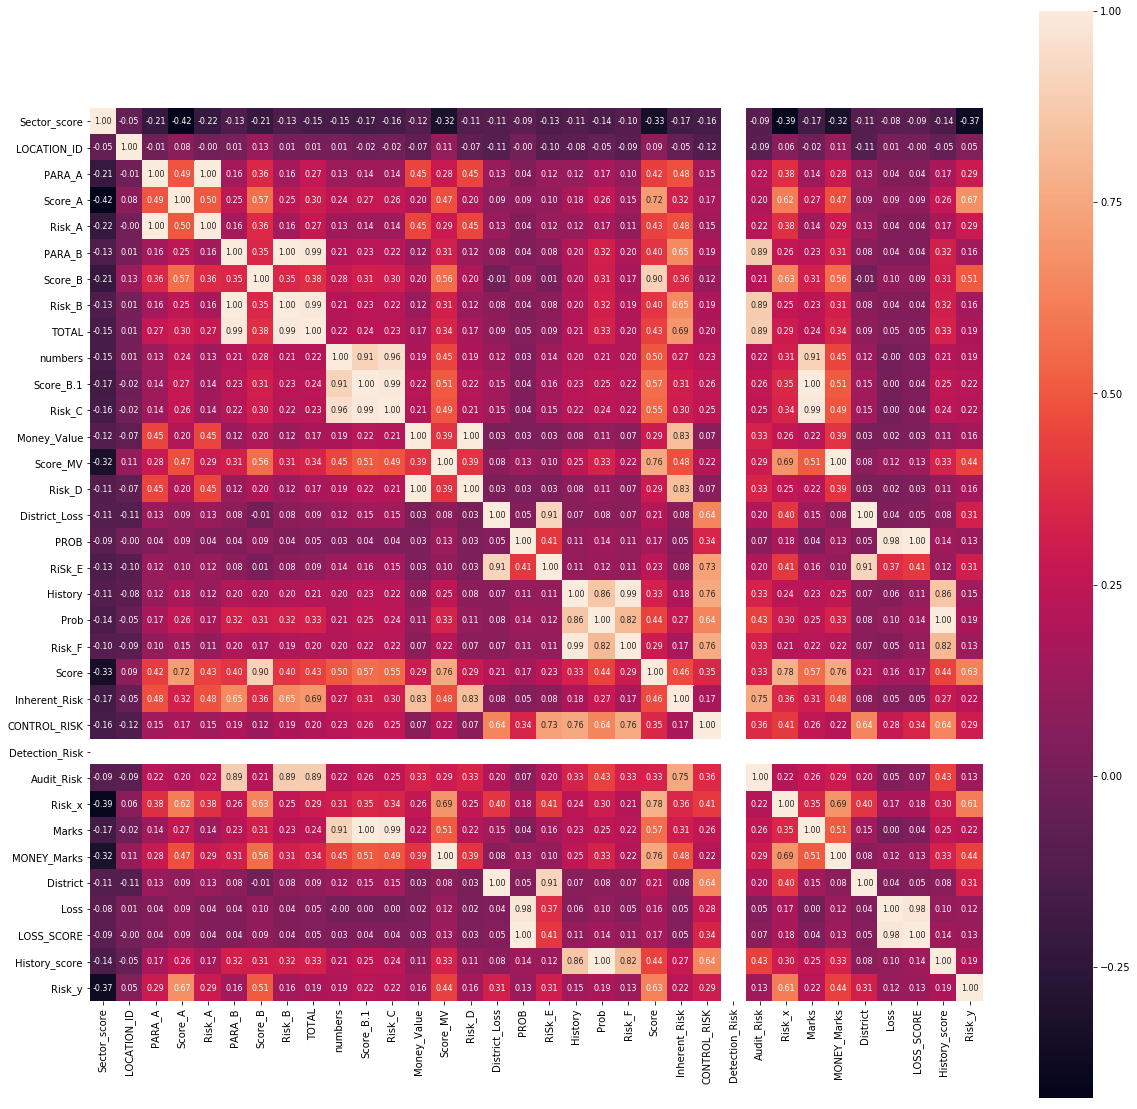

In [105]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)


INFERENCES: 

From the above correlation, we can draw conclusions as follows: 
1. The column Detection_Risk has all values 0.5 and thus can be removed
2. Presence of highly correlated pairs(corr = 1) : PARA_A and Risk_A, PARA_B and Risk_B, Score_B.1 and Marks, Risk_D and Money_Value, Score_MV and MONEY_Marks, District_Loss and District, PROB and LOSS_SCORE, Prob and History_Score
3. RiSk_E and District, Risk_F and History, Score and Score_B and several others with corr = 0.99, 0.98, 0.91 etc

As it is important to have independent variables to reduce multicolinearity, we can consider only one column from each of the above pairs.

In [106]:
df['Detection_Risk'].value_counts()

0.5    760
Name: Detection_Risk, dtype: int64

In [107]:
df = df.drop(['Detection_Risk','Risk_A','Risk_B','Score_B.1','Risk_D','MONEY_Marks',
              'RiSk_E','Risk_F','Score','Risk_C','District'], axis = 1)
#'TOTAL','History_score', 'LOSS_SCORE', 'District_Loss'

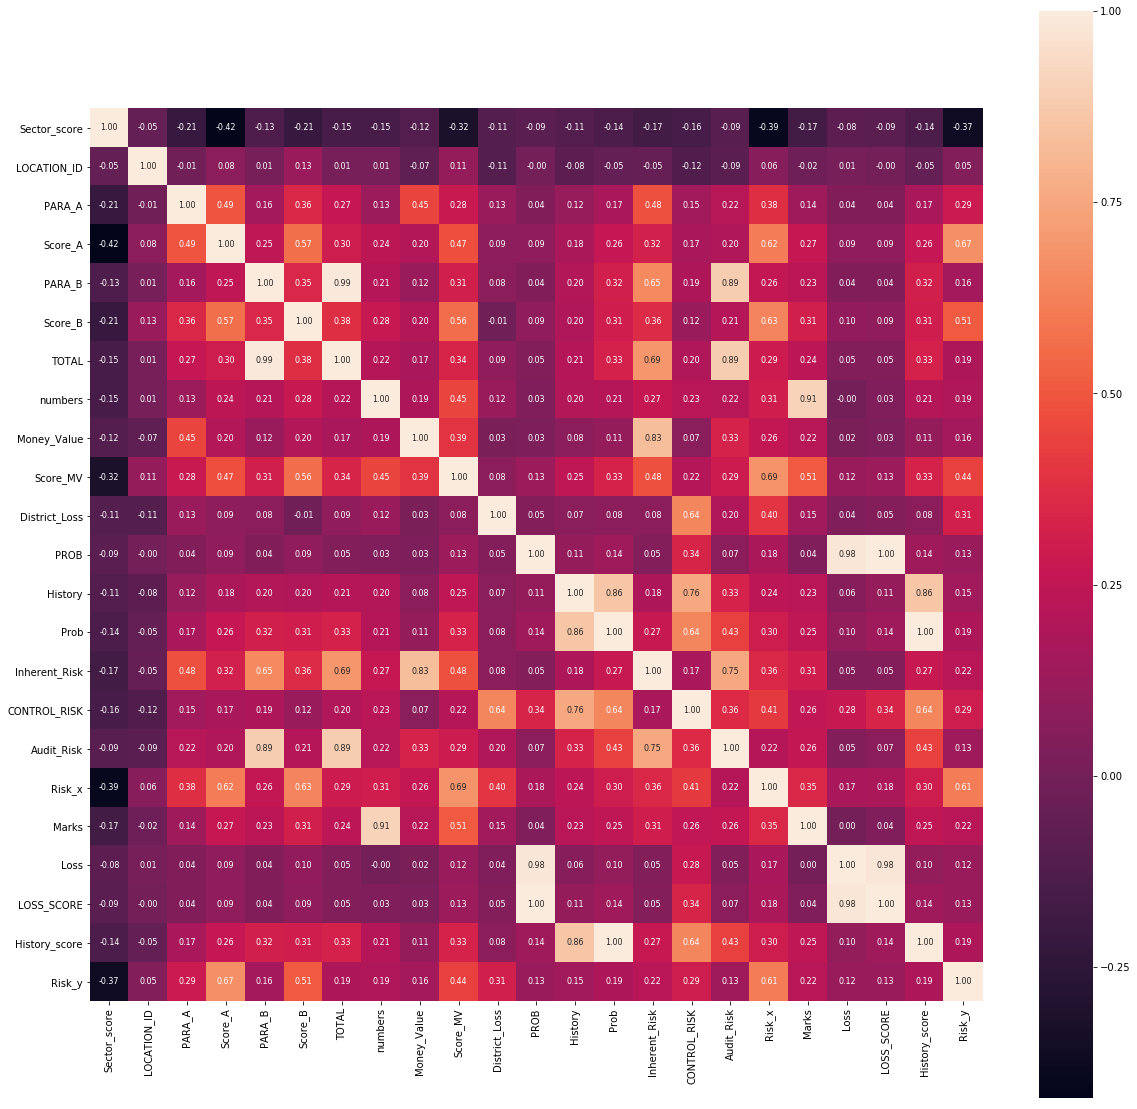

In [108]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)

INFERENCE: 

It can be noted that inspite of removing the factors, their original dependants still continue to be highly correlated with other factors. Eg. Score_B.1 and Marks had corr = 1 due to which Score_B.1 was removed. But Marks still has a correl = 0.91 with numbers(Historical discrepancy score) which is an important risk factor. We therefore continue to drop other columns in the dataset df

This scenario continues for other pairs and thus factors: PARA_A, PARA_B, numbers, Money_Value, Sector_score, District, History and Loss seem to be important and prove independent for the outcome variables

RESEARCH:

The research conducted originally on this dataset made use of Particle Swarm optimization(PSO) for feature extraction. It minimizes the total root of squared differences between Audit risk and total of product of features and their respective weights. According to their analysis the Fraud was dependent on: PARA_A, PARA_B, numbers, Money_Value, Sector_score, History, District, Loss

Thus through study and inference from the results of the correlation we were able to identify and extract the dependent features.

In [109]:
df = df.drop(['Score_A','Score_B','LOCATION_ID','PROB','LOSS_SCORE','Score_MV','Inherent_Risk','CONTROL_RISK'], axis = 1)
#'Marks'

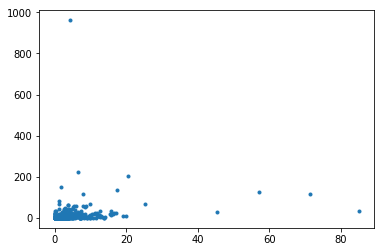

In [110]:
plt.plot(df['PARA_A'],df['Audit_Risk'],'.')

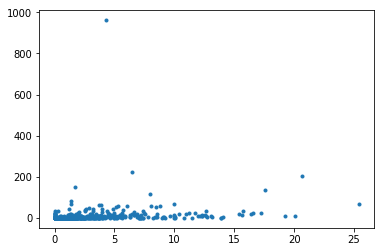

In [111]:
df=df[abs(df['PARA_A'])<40]
plt.plot(df['PARA_A'],df['Audit_Risk'],'.')

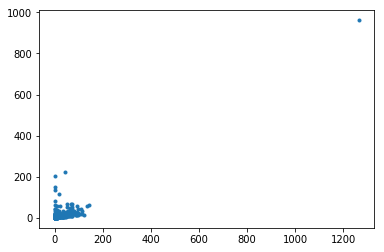

In [112]:
plt.plot(df['PARA_B'],df['Audit_Risk'],'.')

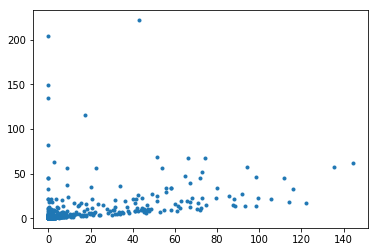

In [113]:
df=df[abs(df['PARA_B'])<200]
plt.plot(df['PARA_B'],df['Audit_Risk'],'.')

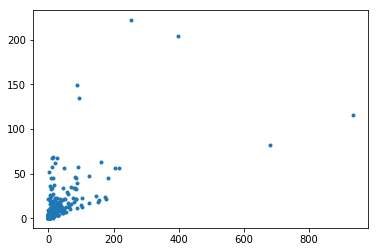

In [114]:
plt.plot(df['Money_Value'],df['Audit_Risk'],'.')

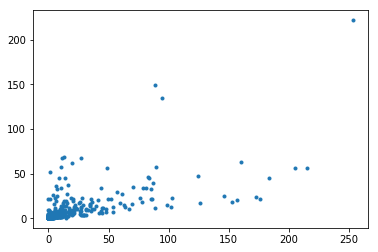

In [115]:
df=df[abs(df['Money_Value'])<300]
plt.plot(df['Money_Value'],df['Audit_Risk'],'.')

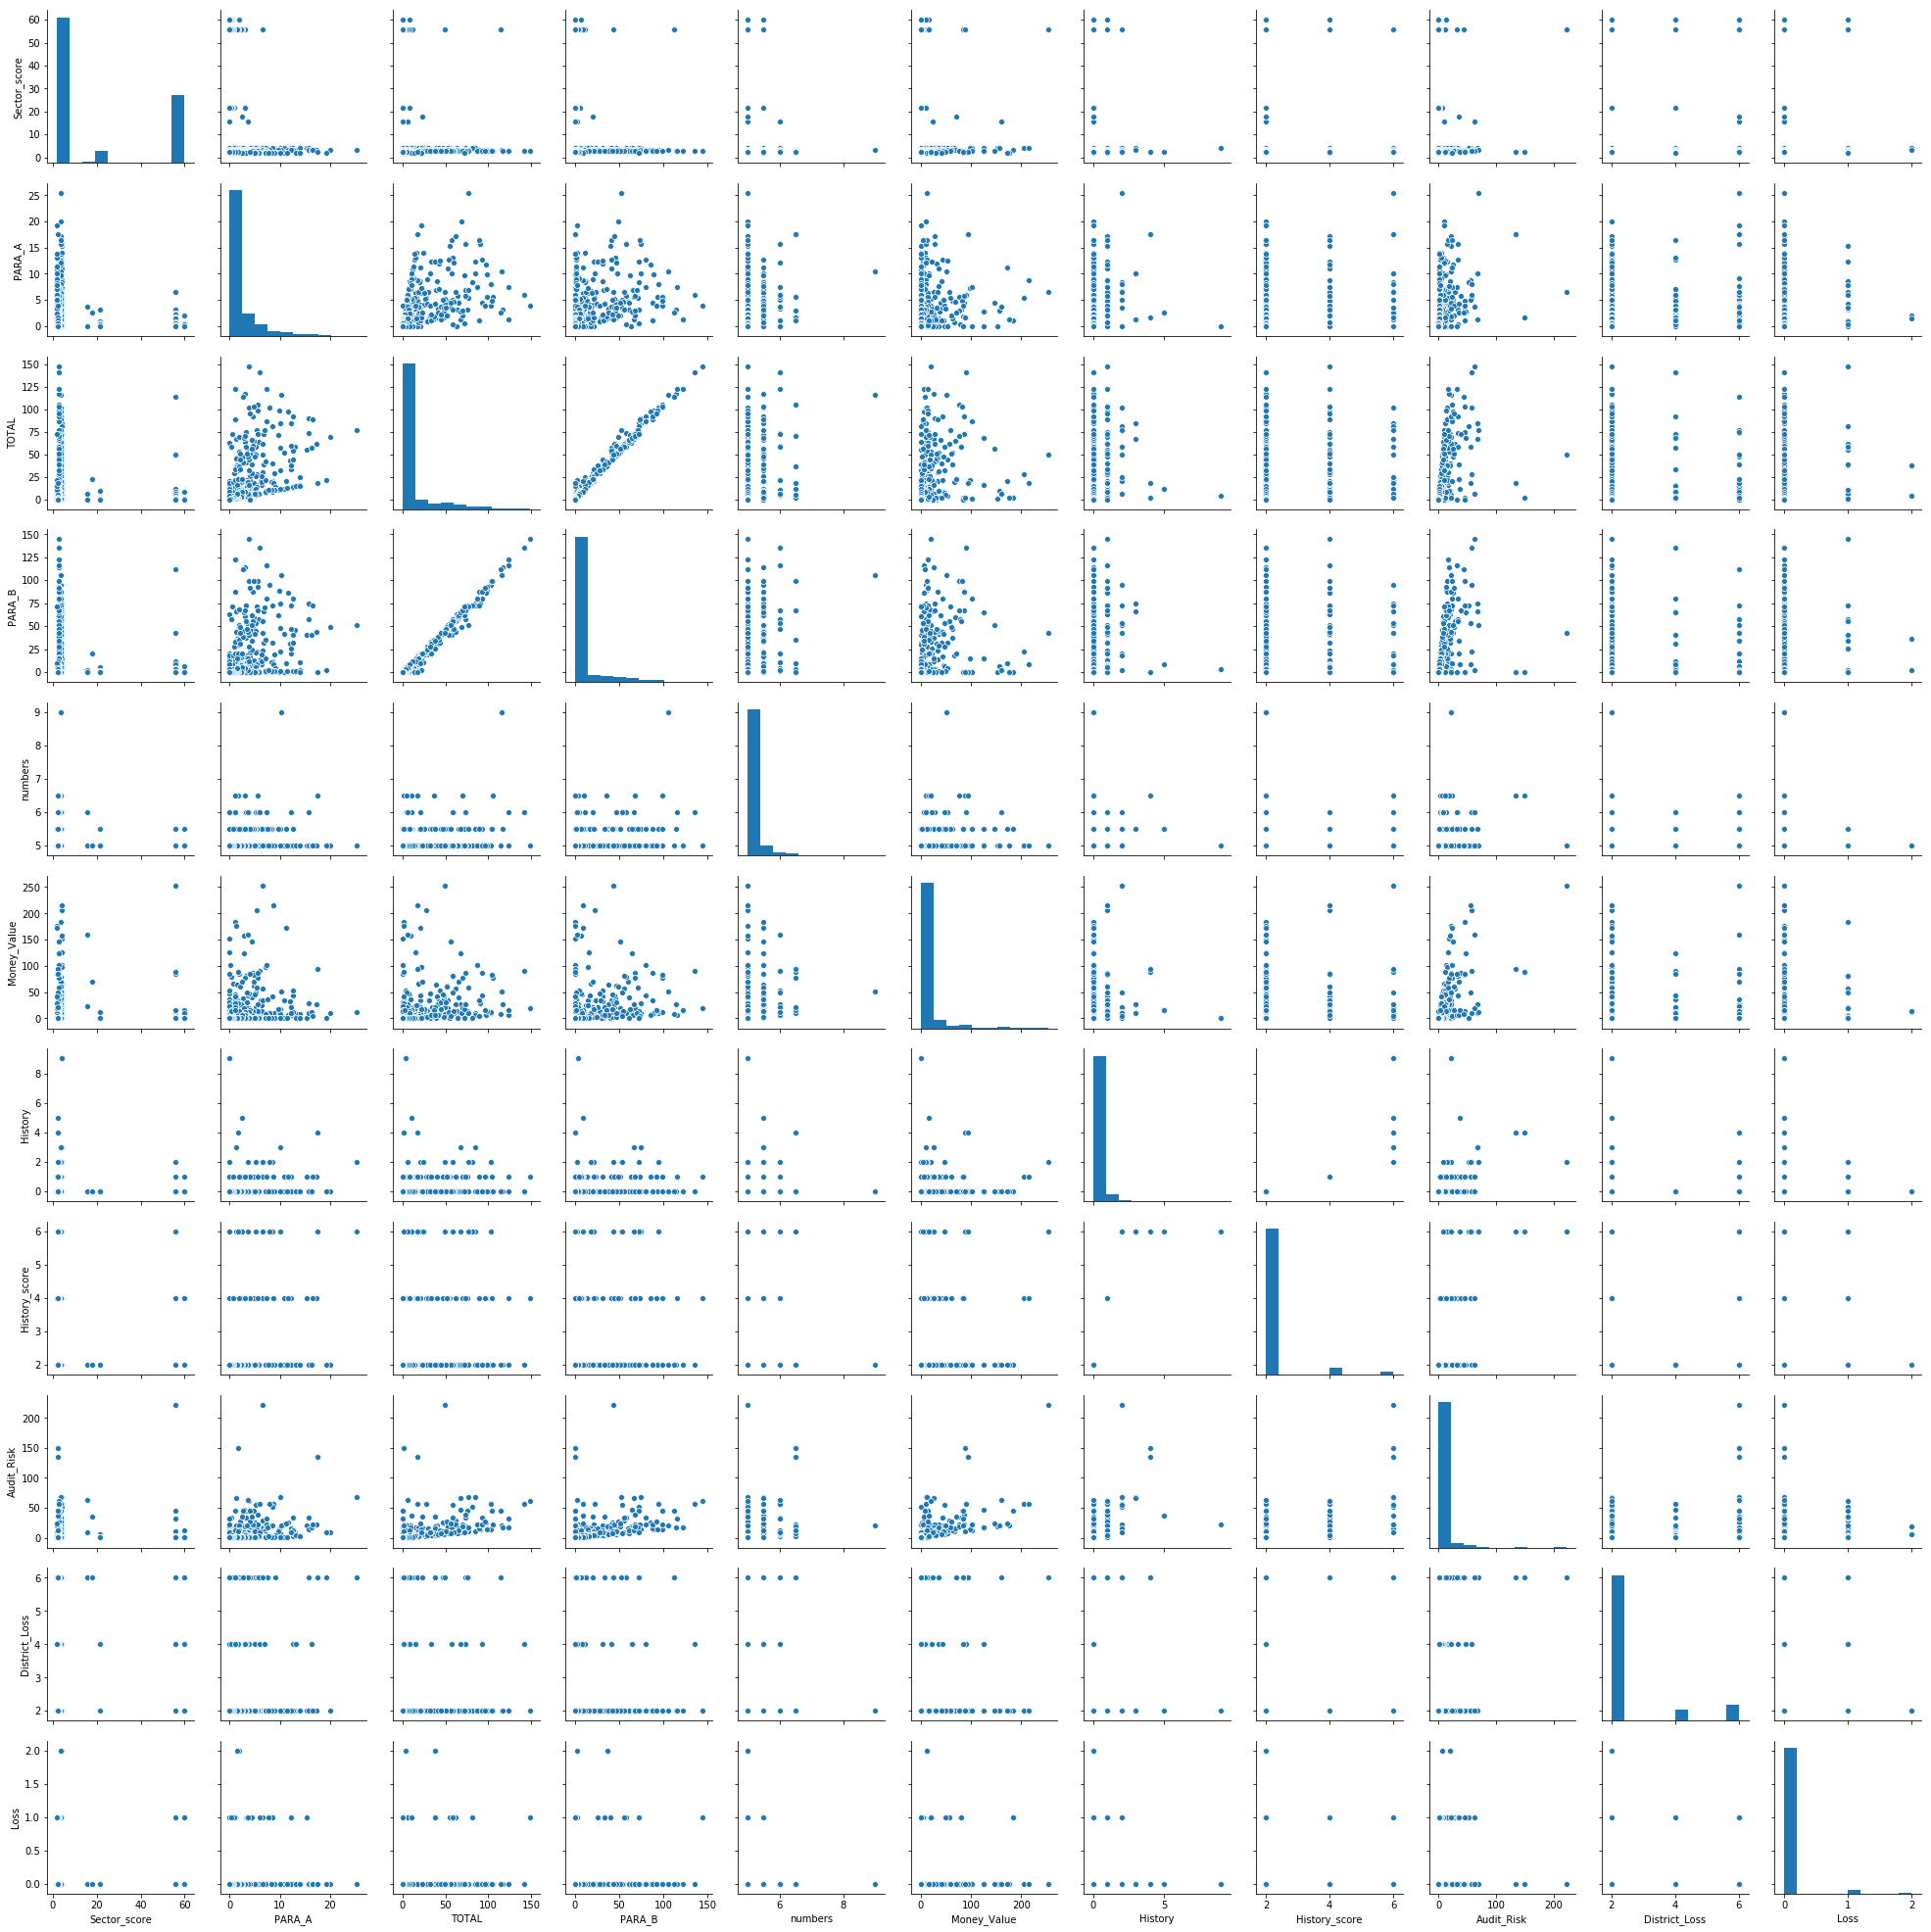

In [116]:
df.columns
sns.pairplot(df[['Sector_score','PARA_A','TOTAL','PARA_B','numbers','Money_Value','History',
                 'History_score','Audit_Risk','District_Loss','Loss']].dropna(how = 'any', axis = 0))

In [117]:
x = df.drop(['Audit_Risk','Risk_x','Risk_y'], axis = 1)
y1 = df['Audit_Risk']

In [118]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 752 entries, 0 to 762
Data columns (total 12 columns):
Sector_score     752 non-null float64
PARA_A           752 non-null float64
PARA_B           752 non-null float64
TOTAL            752 non-null float64
numbers          752 non-null float64
Money_Value      752 non-null float64
District_Loss    752 non-null int64
History          752 non-null int64
Prob             752 non-null float64
Marks            752 non-null int64
Loss             752 non-null int64
History_score    752 non-null int64
dtypes: float64(7), int64(5)
memory usage: 76.4 KB


# Data Preparation

1. Create a csv file to record the best parameters and model evaluations. This can be later used to find the best regressor for this dataset
2. Applied Scaling and split the dataset into train and test

In [119]:
f = open('Result2.csv', 'w')
line = 'Model,Best params,Train score,Test score\n'
f.write(line)
f.close()

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train_org, x_test_org, Y_train, Y_test = train_test_split(x, y1, random_state = 0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train_org)
X_test = scaler.transform(x_test_org)

# Regression

## <font color='red'> Bagging and Pasting

### 1. Linear regression

In [36]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
from sklearn.model_selection import cross_val_score

CvScores = cross_val_score(lreg, X_train, Y_train, cv=5)
print("CV Scores: {}".format(CvScores))
CvScores

Train_Score = CvScores.mean()
print("Train Set Score: {:.2f}".format(Train_Score))
lreg.fit(X_train, Y_train)
Test_Score = lreg.score(X_test,Y_test)
print("Test Set Score: {:.2f}".format(Test_Score))

CV Scores: [0.05138805 0.69599816 0.78477213 0.67908091 0.75975648]
Train Set Score: 0.59
Test Set Score: 0.52


### Linear Regression with Bagging

In [37]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

bag_lreg = BaggingRegressor(lreg, bootstrap = True,oob_score=True,random_state=0)
param_grid = {'n_estimators': [50,100,200]}
grid_bag_lreg = GridSearchCV(bag_lreg, param_grid, cv = 5,return_train_score=True)
grid_bag_lreg.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=True,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [38]:
print("Best parameters: {}".format(grid_bag_lreg.best_params_))
# grid_bag_lreg.cv_results_['params'][grid_bag_lreg.best_index_]

Best parameters: {'n_estimators': 100}


In [39]:
bag_lreg = BaggingRegressor(lreg,n_estimators = grid_bag_lreg.best_params_['n_estimators'],bootstrap = True,oob_score=True,random_state=0)
bag_lreg.fit(X_train, Y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_bag_lreg.best_score_))
print("Train Set Score: {}".format(grid_bag_lreg.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_bag_lreg.score(X_test,Y_test)))
print("Oob Score: {}".format(bag_lreg.oob_score_))

Best cross-validation accuracy: 0.65
Train Set Score: 0.798455378526024
Test Set Score: 0.4231695115159254
Oob Score: 0.6349783922765273


### Linear Regression with Pasting

In [40]:
p_lreg = BaggingRegressor(lreg, bootstrap = False,random_state=0)
param_grid = {'n_estimators': [50,100,200]}
grid_p_lreg = GridSearchCV(p_lreg, param_grid, cv = 5,return_train_score=True)
grid_p_lreg.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [41]:
print("Best parameters: {}".format(grid_p_lreg.best_params_))
print("Best cross-validation accuracy: {:.2f}".format(grid_bag_lreg.best_score_))
print("Train Set Score: {}".format(grid_bag_lreg.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_bag_lreg.score(X_test,Y_test)))

Best parameters: {'n_estimators': 200}
Best cross-validation accuracy: 0.65
Train Set Score: 0.798455378526024
Test Set Score: 0.4231695115159254


### 2 : KNN Regressor 

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
model_knn = KNeighborsRegressor()

param_knn = {'n_neighbors':[1, 5, 10, 15, 20]}
print("Defined Parameters:\n{}".format(param_knn))

grid_knn = GridSearchCV(model_knn, param_grid = param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, Y_train)

Defined Parameters:
{'n_neighbors': [1, 5, 10, 15, 20]}


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 5, 10, 15, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
print("Best cross-validation accuracy: {:.2f}".format(grid_knn.best_score_))
print("Best parameters: {}".format(grid_knn.best_params_))
print("Train Set Score: {}".format(grid_knn.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_knn.score(X_test,Y_test)))

Best cross-validation accuracy: 0.63
Best parameters: {'n_neighbors': 5}
Train Set Score: 0.7055902029562229
Test Set Score: 0.6549113924142497


### KNN with Bagging

In [44]:
best_model_knn = KNeighborsRegressor(n_neighbors = grid_knn.best_params_['n_neighbors'])

bag_knn = BaggingRegressor(best_model_knn, bootstrap = True,oob_score=True,random_state=0)
param_grid = {'n_estimators': [50,100,200]}
grid_bag_knn = GridSearchCV(bag_knn, param_grid, cv = 5,return_train_score=True)
grid_bag_knn.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_bag_knn.best_params_))

Best parameters: {'n_estimators': 100}


In [45]:
best_bag_knn = BaggingRegressor(best_model_knn,n_estimators = grid_bag_knn.best_params_['n_estimators'],bootstrap = True,oob_score=True,random_state=0)
best_bag_knn.fit(X_train, Y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid_bag_knn.best_score_))
print("Train Set Score: {}".format(grid_bag_knn.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_bag_knn.score(X_test,Y_test)))
print("Oob Score: {}".format(best_bag_knn.oob_score_))

Best cross-validation accuracy: 0.64
Train Set Score: 0.719156193103756
Test Set Score: 0.6838585443617368
Oob Score: 0.5532062975680756


### KNN with Pasting

In [46]:
p_knn = BaggingRegressor(best_model_knn, bootstrap = False,random_state=0)
param_grid = {'n_estimators': [50,100,200]}
grid_p_knn = GridSearchCV(p_knn, param_grid, cv = 5,return_train_score=True)
grid_p_knn.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=BaggingRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
         bootstrap=False, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=None, oob_score=False,
         random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [47]:
print("Best cross-validation accuracy: {:.2f}".format(grid_p_knn.best_score_))
print("Best parameters: {}".format(grid_p_knn.best_params_))
print("Train Set Score: {}".format(grid_p_knn.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_p_knn.score(X_test,Y_test)))

Best cross-validation accuracy: 0.63
Best parameters: {'n_estimators': 50}
Train Set Score: 0.7055902029562231
Test Set Score: 0.6549113924142496


## <font color='red'> AdaBoost

## Linear Regression

In [48]:
from sklearn.ensemble import AdaBoostRegressor

adbst_lreg = AdaBoostRegressor(lreg,random_state=0)
param_grid = {'learning_rate': [0.01,0.03,0.1,0.3,1.0],
              'n_estimators': [50,100,200]}
grid_adbst_lreg = GridSearchCV(adbst_lreg, param_grid, cv = 5,return_train_score=True)
grid_adbst_lreg.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.03, 0.1, 0.3, 1.0], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [49]:
print("Best cross-validation accuracy: {:.2f}".format(grid_adbst_lreg.best_score_))
print("Best parameters: {}".format(grid_adbst_lreg.best_params_))
print("Train Set Score: {}".format(grid_adbst_lreg.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_adbst_lreg.score(X_test,Y_test)))

Best cross-validation accuracy: 0.58
Best parameters: {'learning_rate': 0.01, 'n_estimators': 50}
Train Set Score: 0.8068204451595058
Test Set Score: 0.558665823704299


## KNN

In [50]:
adbst_knn = AdaBoostRegressor(best_model_knn,random_state=0)
param_grid = {'learning_rate': [0.01,0.03,0.1,0.3,1.0],
              'n_estimators': [50,100,200]}
grid_adbst_knn = GridSearchCV(adbst_knn, param_grid, cv = 5,return_train_score=True)
grid_adbst_knn.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.03, 0.1, 0.3, 1.0], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [51]:
print("Best cross-validation accuracy: {:.2f}".format(grid_adbst_knn.best_score_))
print("Best parameters: {}".format(grid_adbst_knn.best_params_))
print("Train Set Score: {}".format(grid_adbst_knn.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_adbst_knn.score(X_test,Y_test)))

Best cross-validation accuracy: 0.65
Best parameters: {'learning_rate': 0.03, 'n_estimators': 50}
Train Set Score: 0.9356324246112127
Test Set Score: 0.8688927886822926


## SGD Regressor

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor()

param_sgd = {'max_iter': [10, 100, 1000],'learning_rate':['optimal'], 'penalty' :['l1','l2'],'random_state':[0]}
print("Defined Parameters:\n{}".format(param_sgd))

grid_sgd = GridSearchCV(estimator = sgd_reg, param_grid = param_sgd, cv=5, return_train_score=True)
grid_sgd.fit(X_train, Y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid_sgd.best_score_))
print("Best parameters: {}".format(grid_sgd.best_params_))
print("Train Set Score: {}".format(grid_sgd.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_sgd.score(X_test, Y_test)))


Defined Parameters:
{'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]}
Best cross-validation accuracy: -4606224218426.58
Best parameters: {'learning_rate': 'optimal', 'max_iter': 1000, 'penalty': 'l2', 'random_state': 0}
Train Set Score: -3614184283.899399
Test Set Score: -467339706.746793


## SGD with Adaboost Boosting

In [53]:
best_sgd_reg=SGDRegressor(learning_rate=grid_sgd.best_params_['learning_rate'],
                          max_iter=grid_sgd.best_params_['max_iter'],penalty=grid_sgd.best_params_['penalty'],
                          random_state=0)

adbst_sgd = AdaBoostRegressor(best_sgd_reg,random_state=0)
param_grid = {'learning_rate': [0.01,0.03,0.1,0.3,1.0],
              'n_estimators': [50,100,200]}
grid_adbst_sgd = GridSearchCV(adbst_sgd, param_grid, cv = 5,return_train_score=True)
grid_adbst_sgd.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=0, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False),
         learning_rate=1.0, loss='linear', n_estimators=50, random_state=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'learning_rate': [0.01, 0.03, 0.1, 0.3, 1.0], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [54]:
print("Best cross-validation accuracy: {:.2f}".format(grid_adbst_sgd.best_score_))
print("Best parameters: {}".format(grid_adbst_sgd.best_params_))
print("Train Set Score: {}".format(grid_adbst_sgd.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_adbst_sgd.score(X_test,Y_test)))

Best cross-validation accuracy: -120393196.70
Best parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Train Set Score: -1674958.0642775989
Test Set Score: -1381509.899383894


# Gradient Boosting

## SGD 

In [55]:
from  sklearn.ensemble import GradientBoostingRegressor
gbrt_sgd = GradientBoostingRegressor(random_state=0)
param_grid = {'max_depth':[1,2],
              'learning_rate' : [0.01,0.03,0.1,0.3,1.0],
              'n_estimators': [50,100,200]}
grid_gbrt_sgd = GridSearchCV(gbrt_sgd, param_grid, cv = 5,return_train_score=True)
grid_gbrt_sgd.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...ate=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2], 'learning_rate': [0.01, 0.03, 0.1, 0.3, 1.0], 'n_estimators': [50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [56]:
print("Best cross-validation accuracy: {:.2f}".format(grid_gbrt_sgd.best_score_))
print("Best parameters: {}".format(grid_gbrt_sgd.best_params_))
print("Train Set Score: {}".format(grid_gbrt_sgd.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_gbrt_sgd.score(X_test,Y_test)))

Best cross-validation accuracy: 0.82
Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Train Set Score: 0.9967012760853965
Test Set Score: 0.9095345205959066


## SVM Kernel=rbf

In [57]:
from sklearn.svm import SVR
model_RadSVM = SVR(kernel = 'rbf')
param_RadSVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Defined Parameters:\n{}".format(param_RadSVM))

grid_RadSVM = GridSearchCV(model_RadSVM, param_grid = param_RadSVM, cv=5, return_train_score=True)
grid_RadSVM.fit(X_train, Y_train)

print("Best parameters: {}".format(grid_RadSVM.best_params_))
grid_RadSVMdata = pd.DataFrame(grid_RadSVM.cv_results_)
grid_RadSVMdata = grid_RadSVMdata[['params','mean_train_score','mean_test_score']]
grid_RadSVMdata

print("Best cross-validation accuracy: {:.2f}".format(grid_RadSVM.best_score_))
print("Best parameters: {}".format(grid_RadSVM.best_params_))
print("Train Set Score: {}".format(grid_RadSVM.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_RadSVM.score(X_test, Y_test)))

Defined Parameters:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation accuracy: 0.85
Best parameters: {'C': 100, 'gamma': 0.1}
Train Set Score: 0.8313719963097048
Test Set Score: 0.8033452287970685


In [58]:
best_model_RadSVM=SVR(kernel = 'rbf',C=grid_RadSVM.best_params_['C'],gamma=grid_RadSVM.best_params_['gamma'])

gbrt_RadSVM = GradientBoostingRegressor(random_state=0)
param_grid = {'max_depth':[1,2],
              'learning_rate' : [0.01,0.03,0.1,0.3,1.0],
              'n_estimators': [50,100,200]}
grid_gbrt_RadSVM = GridSearchCV(gbrt_RadSVM, param_grid, cv = 5,return_train_score=True)
grid_gbrt_RadSVM.fit(X_train, Y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid_gbrt_RadSVM.best_score_))
print("Best parameters: {}".format(grid_gbrt_RadSVM.best_params_))
print("Train Set Score: {}".format(grid_gbrt_RadSVM.score(X_train, Y_train)))
print("Test Set Score: {}".format(grid_gbrt_RadSVM.score(X_test,Y_test)))

Best cross-validation accuracy: 0.82
Best parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}
Train Set Score: 0.9967012760853965
Test Set Score: 0.9095345205959066


# PCA 

In [59]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_reduced_train = pca.fit_transform(X_train)
X_reduced_test = pca.transform(X_test)

In [60]:
pca.explained_variance_ratio_.sum()

0.963619289359193

## Linear Regression post PCA

In [61]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
from sklearn.model_selection import cross_val_score

CvScores = cross_val_score(lreg, X_reduced_train, Y_train, cv=5)
print("CV Scores: {}".format(CvScores))

Train_Score = CvScores.mean()
print("Train Set Score: {:.2f}".format(Train_Score))
lreg.fit(X_reduced_train, Y_train)
Test_Score = lreg.score(X_reduced_test,Y_test)
print("Test Set Score: {:.2f}".format(Test_Score))

f = open('Result2.csv', 'a')
line  = 'Linear Regression,'+'None,'+ str(Train_Score) + ',' + str(Test_Score) + '\n'
f.write(line)
f.close()

CV Scores: [0.60532368 0.63710654 0.68958238 0.47619181 0.58120223]
Train Set Score: 0.60
Test Set Score: 0.60


## KNN post PCA 

In [62]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
model_knn = KNeighborsRegressor()

param_knn = {'n_neighbors':[1, 5, 10, 15, 20]}
print("Defined Parameters:\n{}".format(param_knn))

grid_knn = GridSearchCV(model_knn, param_grid = param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_reduced_train, Y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid_knn.best_score_))
print("Best parameters: {}".format(grid_knn.best_params_))
print("Train Set Score: {}".format(grid_knn.score(X_reduced_train, Y_train)))
print("Test Set Score: {}".format(grid_knn.score(X_reduced_test,Y_test)))

Defined Parameters:
{'n_neighbors': [1, 5, 10, 15, 20]}
Best cross-validation accuracy: 0.61
Best parameters: {'n_neighbors': 10}
Train Set Score: 0.6352247339711624
Test Set Score: 0.6553879750416964


In [63]:
f = open('Result2.csv', 'a')
line  = 'KNN Regression,'+'K = 10,'+str(grid_knn.score(X_reduced_train, Y_train))+','+str(grid_knn.score(X_reduced_test,Y_test)) + '\n'
f.write(line)
f.close()

## Ridge post PCA

In [64]:
from sklearn.linear_model import Ridge
model_ridge = Ridge()
param_ridge = {'alpha': [0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000]}
print("Defined Parameters:\n{}".format(param_ridge))

grid_ridge = GridSearchCV(estimator = model_ridge,param_grid = param_ridge, cv=5, return_train_score=True)
grid_ridge.fit(X_reduced_train, Y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid_ridge.best_score_))
print("Best parameters: {}".format(grid_ridge.best_params_))
print("Train Set Score: {}".format(grid_ridge.score(X_reduced_train, Y_train)))
print("Test Set Score: {}".format(grid_ridge.score(X_reduced_test, Y_test)))

Defined Parameters:
{'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]}
Best cross-validation accuracy: 0.65
Best parameters: {'alpha': 10}
Train Set Score: 0.6114019600002037
Test Set Score: 0.6000754075058488


In [65]:
f = open('Result2.csv', 'a')
line  = 'Ridge Regression,'+'alpha = 10,'+str(grid_ridge.score(X_reduced_train, Y_train))+','+str(grid_ridge.score(X_reduced_test,Y_test)) + '\n'
f.write(line)
f.close()

## Lasso post PCA

In [66]:
from  sklearn.linear_model import Lasso
model_lasso = Lasso()

param_lasso = {'alpha': [0.001,0.003,0.01,0.03,0.1,0.3,1,3,10,30,100,300,1000]}
print("Defined Parameters:\n{}".format(param_lasso))

grid_lasso = GridSearchCV(model_lasso, param_grid = param_lasso, cv=5, return_train_score=True)
grid_lasso.fit(X_reduced_train, Y_train)

print("Best cross-validation accuracy: {:.2f}".format(grid_lasso.best_score_))
print("Best parameters: {}".format(grid_lasso.best_params_))
print("Train Set Score: {}".format(grid_lasso.score(X_reduced_train, Y_train)))
print("Test Set Score: {}".format(grid_lasso.score(X_reduced_test, Y_test)))

Defined Parameters:
{'alpha': [0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]}
Best cross-validation accuracy: 0.65
Best parameters: {'alpha': 0.3}
Train Set Score: 0.6065538973551001
Test Set Score: 0.5838857811903525


In [67]:
f = open('Result2.csv', 'a')
line  = 'Lasso Regression,'+'alpha = 0.3,'+str(grid_lasso.score(X_reduced_train, Y_train))+','+str(grid_lasso.score(X_reduced_test,Y_test)) + '\n'
f.write(line)
f.close()

## Polynomial Regression post PCA

In [68]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)

Train_Score_List = []
Test_Score_List = []
lreg_poly = LinearRegression()

X_Train_Poly = poly.fit_transform(X_reduced_train)
X_Test_Poly = poly.transform(X_reduced_test)
PolCVScore = cross_val_score(lreg_poly, X_Train_Poly, Y_train, cv=5)
lreg_poly.fit(X_Train_Poly,Y_train)
Train_ScorePoly = lreg_poly.score(X_Test_Poly,Y_test)

Train_ScorePoly = PolCVScore.mean()
print("Train Set Score: {:.2f}".format(PolCVScore.mean()))
print("Test Set Score: {:.2f}".format(Train_ScorePoly))

Train Set Score: 0.60
Test Set Score: 0.60


In [69]:
f = open('Result2.csv', 'a')
line  = 'Polynomial Regression,'+'Degree = 2,'+str(PolCVScore.mean())+','+str(Train_ScorePoly) + '\n'
f.write(line)
f.close()

## SGD Regressor post PCA

In [70]:
from sklearn.linear_model import SGDRegressor
sgd_reg=SGDRegressor()

param_sgd = {'max_iter': [10, 100, 1000],'learning_rate':['optimal'], 'penalty' :['l1','l2'],'random_state':[0]}
print("Defined Parameters:\n{}".format(param_sgd))

grid_sgd = GridSearchCV(estimator = sgd_reg, param_grid = param_sgd, cv=5, return_train_score=True)
grid_sgd.fit(X_reduced_train, Y_train)

print("Best parameters: {}".format(grid_sgd.best_params_))

print("Best cross-validation accuracy: {:.2f}".format(grid_sgd.best_score_))
print("Best parameters: {}".format(grid_sgd.best_params_))
print("Train Set Score: {}".format(grid_sgd.score(X_reduced_train, Y_train)))
print("Test Set Score: {}".format(grid_sgd.score(X_reduced_test, Y_test)))

Defined Parameters:
{'max_iter': [10, 100, 1000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2'], 'random_state': [0]}
Best parameters: {'learning_rate': 'optimal', 'max_iter': 100, 'penalty': 'l1', 'random_state': 0}
Best cross-validation accuracy: 0.60
Best parameters: {'learning_rate': 'optimal', 'max_iter': 100, 'penalty': 'l1', 'random_state': 0}
Train Set Score: 0.3914223360955975
Test Set Score: 0.17246520900601559


In [71]:
f = open('Result2.csv', 'a')
line  = 'SGD Regression,'+'learning_rate = optimal max_iter = 100 penalty = l1,'+str(grid_sgd.score(X_reduced_train, Y_train))+','+str(grid_sgd.score(X_reduced_test, Y_test)) + '\n'
f.write(line)
f.close()

## Linear SVR post PCA

In [72]:
from sklearn.svm import LinearSVR
model_LSVM = LinearSVR()
param_LSVM = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
print("Defined Parameters:\n{}".format(param_LSVM))

grid_LSVM = GridSearchCV(model_LSVM, param_grid = param_LSVM, cv=5, return_train_score=True)
grid_LSVM.fit(X_reduced_train, Y_train)

print("Best parameters: {}".format(grid_LSVM.best_params_))
grid_LSVMdata = pd.DataFrame(grid_LSVM.cv_results_)
grid_LSVMdata = grid_LSVMdata[['params','mean_train_score','mean_test_score']]
grid_LSVMdata

print("Best cross-validation accuracy: {:.2f}".format(grid_LSVM.best_score_))
print("Best parameters: {}".format(grid_LSVM.best_params_))
print("Train Set Score: {}".format(grid_LSVM.score(X_reduced_train, Y_train)))
print("Test Set Score: {}".format(grid_LSVM.score(X_reduced_test, Y_test)))

Defined Parameters:
{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
Best parameters: {'C': 100}
Best cross-validation accuracy: 0.61
Best parameters: {'C': 100}
Train Set Score: 0.5156289673951262
Test Set Score: 0.5372352200664814


In [73]:
f = open('Result2.csv', 'a')
line  = 'Linear SVM,'+str(grid_LSVM.best_params_)+','+str(grid_LSVM.score(X_reduced_train, Y_train))+','+str(grid_LSVM.score(X_reduced_test, Y_test)) + '\n'
f.write(line)
f.close()

## SVM Kernel=rbf post PCA

In [74]:
from sklearn.svm import SVR
model_RadSVM = SVR(kernel = 'rbf')
param_RadSVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Defined Parameters:\n{}".format(param_RadSVM))

grid_RadSVM = GridSearchCV(model_RadSVM, param_grid = param_RadSVM, cv=5, return_train_score=True)
grid_RadSVM.fit(X_reduced_train, Y_train)

print("Best parameters: {}".format(grid_RadSVM.best_params_))
grid_RadSVMdata = pd.DataFrame(grid_RadSVM.cv_results_)
grid_RadSVMdata = grid_RadSVMdata[['params','mean_train_score','mean_test_score']]
grid_RadSVMdata

print("Best cross-validation accuracy: {:.2f}".format(grid_RadSVM.best_score_))
print("Best parameters: {}".format(grid_RadSVM.best_params_))
print("Train Set Score: {}".format(grid_RadSVM.score(X_reduced_train, Y_train)))
print("Test Set Score: {}".format(grid_RadSVM.score(X_reduced_test, Y_test)))

Defined Parameters:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation accuracy: 0.72
Best parameters: {'C': 100, 'gamma': 0.1}
Train Set Score: 0.6786494613703661
Test Set Score: 0.6949584159752893


In [75]:
f = open('Result2.csv', 'a')
line  = 'SVM kernel Rbf,'+'c = 100 gamma = 0.1,'+str(grid_RadSVM.score(X_reduced_train, Y_train))+','+str(grid_RadSVM.score(X_reduced_test, Y_test)) + '\n'
f.write(line)
f.close()

## SVM Kernel=poly post PCA

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
model_PolySVM = SVR(kernel = 'poly', degree = 2)
param_PolySVM = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Defined Parameters:\n{}".format(param_PolySVM))

grid_PolySVM = GridSearchCV(model_PolySVM, param_grid = param_PolySVM, cv=5, return_train_score=True)
grid_PolySVM.fit(X_reduced_train, Y_train)

print("Best parameters: {}".format(grid_PolySVM.best_params_))

print("Best cross-validation accuracy: {:.2f}".format(grid_PolySVM.best_score_))
print("Best parameters: {}".format(grid_PolySVM.best_params_))
print("Train Set Score: {}".format(grid_PolySVM.score(X_reduced_train, Y_train)))
print("Test Set Score: {}".format(grid_PolySVM.score(X_reduced_test, Y_test)))

Defined Parameters:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
Best parameters: {'C': 0.001, 'gamma': 100}
Best cross-validation accuracy: 0.67
Best parameters: {'C': 0.001, 'gamma': 100}
Train Set Score: 0.7396255639393536
Test Set Score: 0.7601751096308821


In [77]:
f = open('Result2.csv', 'a')
line  = 'SVM kernel Poly,'+'c = 0.001 gamma = 100,'+str(grid_PolySVM.score(X_reduced_train, Y_train))+','+str(grid_PolySVM.score(X_reduced_test, Y_test)) + '\n'
f.write(line)
f.close()

## Result table for all algorithms after applying PCA

In [78]:
post_pca=pd.read_csv('Result2.csv')
print(post_pca)

                   Model                                        Best params  \
0      Linear Regression                                               None   
1         KNN Regression                                             K = 10   
2       Ridge Regression                                         alpha = 10   
3       Lasso Regression                                        alpha = 0.3   
4  Polynomial Regression                                         Degree = 2   
5         SGD Regression  learning_rate = optimal max_iter = 100 penalty...   
6             Linear SVM                                         {'C': 100}   
7         SVM kernel Rbf                                c = 100 gamma = 0.1   
8        SVM kernel Poly                              c = 0.001 gamma = 100   

   Train score  Test score  
0     0.597881    0.602422  
1     0.635225    0.655388  
2     0.611402    0.600075  
3     0.606554    0.583886  
4     0.597881    0.597881  
5     0.391422    0.172465  
6     

## Result table for all algorithms before applying PCA


In [174]:
pre_pca=pd.read_csv('Result1.csv')
print(pre_pca)

                       Model                 Best params  Train score  \
0           LinearRegression                         NaN     0.803531   
1        KNeighborsRegressor             n_neighbors = 7     1.000000   
2                      Ridge                 alpha = 100     0.792770   
3                      Lasso                   alpha = 1     0.781416   
4                        SVR       C = 100 gamma = 0.001     0.279927   
5                 Polynomial                  degree = 1     0.803531   
6               SGDRegressor  alpha = 1 max_iter = 10000     0.113158   
7             KNN Classifier                       k = 3     0.976950   
8        Logistic Regression              penalty=l1 C=1     0.941489   
9                 Kernel SVC            c=100 gamma=0.01     0.939716   
10  Decision Tree Classifier               max_depth = 4     0.987589   
11                Linear SVC                         c=1     0.939716   

    Test score  
0     0.516751  
1     0.717267  

On comparing the above two tables, we can see that after applying PCA on the data, the test scores for some algorithms like Linear regression, Polynomial, SGD, SVR, kernel rbf and kernel poly have increased whereas for KNN, Ridge and Lasso the test scores have decreased.
Since kernel poly is giving us the best result on the test set, we can say that we can use PCA for dimensionality reduction to obtain better results.

## Deep learning Network

In [152]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import r2_score, recall_score, precision_score

In [153]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(15, input_dim=77, kernel_initializer='normal', activation='relu'))
    model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    #compile model
    model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])
    return model

In [166]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [173]:
#step 1: build model
model = Sequential()
#input layer
model.add(Dense(10, input_dim = 6, activation = 'relu'))
#hidden layers
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
#output layer
model.add(Dense(1, activation='sigmoid'))

#step 2: compile the model
 
model.compile(loss= 'mse' , optimizer = 'adam',metrics = ['mean_absolute_error'] )

#step 3: train the model
model.fit(X_reduced_train, Y_train, epochs = 200, batch_size = 100)

#step 4: evaluate
model.evaluate(X_reduced_train ,Y_train)

Epoch 1/200
564/564 [==============================] - 1s 1ms/sample - loss: 241.9330 - mean_absolute_error: 4.9093
Epoch 2/200
564/564 [==============================] - 0s 25us/sample - loss: 241.7964 - mean_absolute_error: 4.9091
Epoch 3/200
564/564 [==============================] - 0s 24us/sample - loss: 241.6516 - mean_absolute_error: 4.9095
Epoch 4/200
564/564 [==============================] - 0s 30us/sample - loss: 241.5002 - mean_absolute_error: 4.9092
Epoch 5/200
564/564 [==============================] - 0s 24us/sample - loss: 241.3266 - mean_absolute_error: 4.9079
Epoch 6/200
564/564 [==============================] - 0s 22us/sample - loss: 241.1887 - mean_absolute_error: 4.9071
Epoch 7/200
564/564 [==============================] - 0s 25us/sample - loss: 241.0226 - mean_absolute_error: 4.9061
Epoch 8/200
564/564 [==============================] - 0s 26us/sample - loss: 240.8504 - mean_absolute_error: 4.9055
Epoch 9/200
564/564 [==============================] - 0s 27us/sa

564/564 [==============================] - 0s 24us/sample - loss: 237.3634 - mean_absolute_error: 4.9509
Epoch 139/200
564/564 [==============================] - 0s 21us/sample - loss: 237.3633 - mean_absolute_error: 4.9509
Epoch 140/200
564/564 [==============================] - 0s 22us/sample - loss: 237.3632 - mean_absolute_error: 4.9509
Epoch 141/200
564/564 [==============================] - 0s 22us/sample - loss: 237.3631 - mean_absolute_error: 4.9509
Epoch 142/200
564/564 [==============================] - ETA: 0s - loss: 18.9545 - mean_absolute_error: 2.08 - 0s 17us/sample - loss: 237.3630 - mean_absolute_error: 4.9509
Epoch 143/200
564/564 [==============================] - 0s 27us/sample - loss: 237.3630 - mean_absolute_error: 4.9509
Epoch 144/200
564/564 [==============================] - 0s 23us/sample - loss: 237.3629 - mean_absolute_error: 4.9509
Epoch 145/200
564/564 [==============================] - 0s 28us/sample - loss: 237.3628 - mean_absolute_error: 4.9509
Epoch 14

[237.35803633886027, 4.948907]